# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

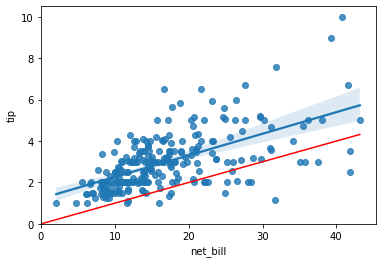

In [3]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct'] < 0.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x

plt.plot(x, y, '-r', label = 'linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 4.53285)

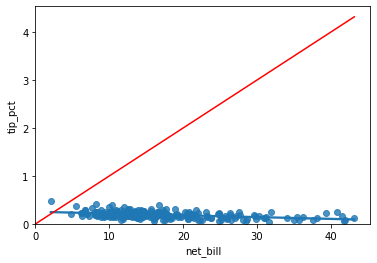

In [4]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct'] < 0.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x

plt.plot(x, y, '-r', label = 'linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No primeiro gráfico, ficou evidente, que a cada vez que aumenta o valor do net_billo valor de tip será maior. Agora no segundo, como estamos analisando o tip_pct que é a porcentagem de tip, então o valor de 10% seria constante. Por este motivo, que no segundo gráfico a linha dos 10% se mantem fixa. Porém notamos também que quanto maior o valor da conta, a porcentagem do tips ou o tip_pct é mais próxima de 10% e em alguns casos, mais baixo que 10%.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [5]:
# 4.1)

reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()

reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.52e-06
Time:                        11:21:52   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
reg_tip_pct.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [7]:
# 4.2)

reg_tip = smf.ols('tip ~ net_bill * tip_pct', data = tips).fit()

reg_tip.fittedvalues

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Length: 244, dtype: float64

In [8]:
# 4.3)

reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.926e+31
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:21:59   Log-Likelihood:                 7828.8
No. Observations:                 244   AIC:                        -1.565e+04
Df Residuals:                     240   BIC:                        -1.564e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.803e-15   5.53e-16      5.070      0.000    1.71e-15    3.89e-15
net_bill          9.021e-17   3.34e-17      2.701      0.007    2.44e-17    1.56e-16
tip_pct           1.776e-15   1.38e-15      1.285      0.200   -9.46e-16     4.5e-15
net_bill:tip_pct     1.0000    1.9e-16   5.25e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       16.855   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.352
Skew:                          -0.227   Prob(JB):                     6.36e-10
Kurtosis:                       4.990   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# 4.4

reg_tip_pct.rsquared

0.09129084920662978

In [10]:
reg_tip.rsquared

1.0

Ao analisar, as funções das variáveis acima, podemos notar que usando a variável tip_pct e net_bill, responde e se tem um Rˆ2 maior.